<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/classification_simple_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
#Load the Dataset
data = datasets.load_digits()

In [0]:
#Assign to Appropriate Variables 
X_data = data.images
Y_data = data.target

In [0]:
#Reshape the input data
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2],1))

In [35]:
print(X_data.shape)

(1797, 8, 8, 1)


In [0]:
#One hot Encoding of targets
Y_data = to_categorical(Y_data)

In [0]:
# Split data into test and train set
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.3)

In [0]:
# Construct the Convlutional Network
model = Sequential()
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size= (2,2), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [0]:
#Add Optimizer and Compile the code
adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [0]:
# Train the network
hist = model.fit(X_train, Y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

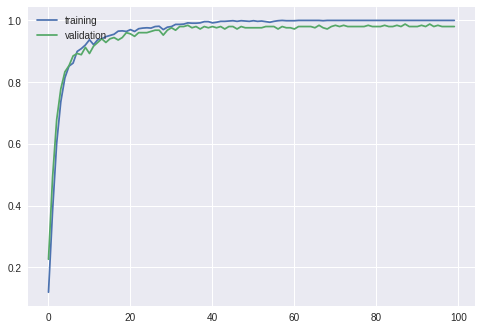

In [42]:
#plot the training history
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [43]:
#Evaluate the result of network
results = model.evaluate(X_test, Y_test)
print('Test Accuracy', results[1])

540/540 [==============================] - 0s 367us/step
Test Accuracy 0.06666666699780358
